![Burnout Banner](https://sa.kapamilya.com/absnews/abscbnnews/media/ancx/culture/2019/57/bannerburnout.jpg?ext=.jpg)

<h1 style="font-family: Comic Sans MS; background-color:#AED6F1; padding: 10px; border-radius: 10px;">🧠 About This Kernel</h1>

In this kernel, we’ll explore the factors contributing to the mental health of individuals, particularly in the tech industry. The dataset used comes from a 2014 survey focusing on attitudes toward mental health and the frequency of mental disorders in tech workplaces.

Unlike traditional data science kernels that focus on modeling directly, we’ll take a step back to **understand the problem through domain knowledge** before diving into data analysis, visualization, and modeling.

---

There are countless kernels showcasing ways to solve technical problems, but very few highlight the importance of domain understanding. This notebook aims to provide a comprehensive look at **mental health in the workplace**, build on that to understand the dataset, perform **EDA**, and develop a **baseline model**.

---

<h1 style="font-family: Comic Sans MS; background-color:#A3E4D7; padding: 10px; border-radius: 10px;">📚 Domain Knowledge 101</h1>

> ### ❓ What exactly do we mean by *Mental Health at the Workplace*?

Mental health refers to our emotional, psychological, and social well-being. It impacts how we think, feel, and act, especially under stress. In workplaces, **inclusion** and **communication** are key to building strong, collaborative teams.

📌 In the US:
- 70% of adults with depression are part of the workforce.
- Depression leads to **35 million missed workdays per year**.
- Productivity losses due to depression cost employers **$105 billion annually**.

![Mental Health Awareness](https://wallpapers.com/images/hd/mental-health-pictures-i8ov8ws3hfw2v4ix.jpg)

---

> ### 💡 What can employers do about this?

### 🛟 Mental Health First Aid

Mental Health First Aid helps employees:
- Recognize signs of mental distress or substance abuse.
- Learn how to offer **support and resources**.
- Increase awareness and **reduce stigma**.

### 🧰 What can be offered:
- **Employee Assistance Programs**
- **Wellness and mental health programs**
- **Flexible schedules or time-off policies**
- **Disability & health insurance**

By creating a mentally healthy environment, organizations can:
- Improve productivity
- Encourage early intervention
- Foster inclusivity and support

---

<h1 style="font-family: Comic Sans MS; background-color:#F9E79F; padding: 10px; border-radius: 10px;">🔍 Initial Understanding of the Data</h1>

Coming up next, we'll explore:
- The structure of the dataset
- Key variables that may influence mental health
- Our plan for **exploratory data analysis (EDA)** and **modeling**


In [1]:
import warnings 
warnings.filterwarnings('ignore')

#basic libraries

import numpy as np
import pandas as pd

#visualization libraries

import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

*1. Loading the data*

*2. Checking the head of the data*

*3. Looking out for the null values*

In [2]:
df = pd.read_csv("../input/mental-health-in-tech-survey/survey.csv")

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


<h3 style="font-family: Comic Sans MS; background-color:#FADBD8; padding: 10px; border-radius: 10px;">📋 Understanding the Columns</h3>

Below are the columns from the dataset along with a short description of what each represents:

- **Timestamp** — When the response was recorded.
- **Age** — Respondent’s age.
- **Gender** — Gender identity.
- **Country** — Country of residence.
- **state** — U.S. state or territory (if applicable).
- **self_employed** — Whether the respondent is self-employed.
- **family_history** — Whether there's a family history of mental illness.
- **treatment** — Has the respondent sought treatment for mental health?
- **work_interfere** — Does mental health interfere with work?
- **no_employees** — Number of employees at the respondent’s workplace.
- **remote_work** — Does the respondent work remotely at least 50% of the time?
- **tech_company** — Is the employer a tech company?
- **benefits** — Are mental health benefits provided?
- **care_options** — Awareness of mental health care options.
- **wellness_program** — Is mental health included in wellness programs?
- **seek_help** — Availability of help-seeking resources.
- **anonymity** — Is anonymity protected when using mental health resources?
- **leave** — Ease of taking medical leave for mental health.
- **mentalhealthconsequence** — Perceived negative consequences of disclosing mental health issues.
- **physhealthconsequence** — Perceived consequences of disclosing physical health issues.
- **coworkers** — Willingness to talk to coworkers about mental health.
- **physhealthinterview** — Willingness to discuss physical health in interviews.
- **mentalvsphysical** — Whether mental health is taken as seriously as physical health.
- **obs_consequence** — Whether negative outcomes have been observed for coworkers with mental health issues.
- **comments** — Any additional comments or notes provided by respondents.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

<h3 style="font-family: Comic Sans MS; background-color:#FADBD8; padding: 10px; border-radius: 10px;">🔍 Important Inferences:</h3>

* There are a total of **26** columns in the dataset.
* We see that except the age column, all the columns are of object datatype.
* Comment column seems to contain most number **( 70% )** of null values, which makes sense because it was an optional text box so it's reasonable to expect that many (most) respondents would leave it blank.
* We will be dropping the timestamp column because it's contains date, month, year and time the respondent took this questionnaire, which is irrelevant for us.
* The state column also contains a lot of null values. We'll dig deeper into that.


In [5]:
print(df['Country'].value_counts())
print("\n \n")
print(df['state'].unique())

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Sweden                      7
Switzerland                 7
Italy                       7
South Africa                6
Brazil                      6
Belgium                     6
Israel                      5
Singapore                   4
Bulgaria                    4
Finland                     3
Russia                      3
Mexico                      3
Austria                     3
Croatia                     2
Greece                      2
Denmark                     2
Colombia                    2
Portugal                    2
Czech Republic              1
Zimbabwe                    1
Latvia                      1
Romania                     1
Uruguay   

<h3 style="font-family: Comic Sans MS; background-color:#FADBD8; padding: 10px; border-radius: 10px;">🔍 Important Inferences:</h3>
* It will be really misleading to conclude that a certain country faces more problem with the mental health of employees because around **60%** of the people belong to The US.
* Moreover there are a lot of countries which have only one respondents.
* The country column thus becomes pointless. We will be dopping this. 
* A quick look at the states suggest us that it is applicable for the one's only in The US, so we'll drop it as well.


In [6]:
df.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

<h1 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;"> Data Preparation & Performing Feature Engineering </h1>


In [7]:
print("The dataset contains different age groups including: \n")
print(df['Age'].unique())
print("\n \n")
print("The different gender notations used in our dataset are: \n")
print(df['Gender'].unique())

The dataset contains different age groups including: 

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

 

The different gender notations used in our dataset are: 

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fl

<h3 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;"> Important Inferences: </h3>

Ofcourse you and I are thinking the  same thing. 

* How can age be negative? And age **below 15 years**? Are they even legally allowed to work?
* Regarding the gender, people have described themselves as male and females in such different ways!
    
    **On a lighter note, this is what happens when you don't take survey questions like this in the form of checkboxes! 😁😁**
    
Lets get back to our work and correct these responses. While this may not be the best way, we will be using this approach for gender column:
We will be renaming and combining all the categories that mean the same into one.

* Male, or cis Male, means born as male and decide to be male.
* Female, or cis Female, means born as female and decide to be female.
* Other, is a word that describes sexual and gender identities other than straight and cisgender. Lesbian, gay, bisexual, and transgender people may all identify with the word other.


In [8]:
df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

In [9]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

Male      988
Female    247
Other      19
Name: Gender, dtype: int64

<h3 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;	"> To be Noted: </h3>

Unknowingly, we have stumbled upon the fact that the number of males in the dataset are 4 times the number of females. Thus, we must keep this in mind and avoid making any faulty assumptions that males are more susceptible to mental health issues etc. 

Alternatively, we may conclude that the number of males in the tech industry are much more as compared to the number of females (This research was conducted specifically for the tech industry.).


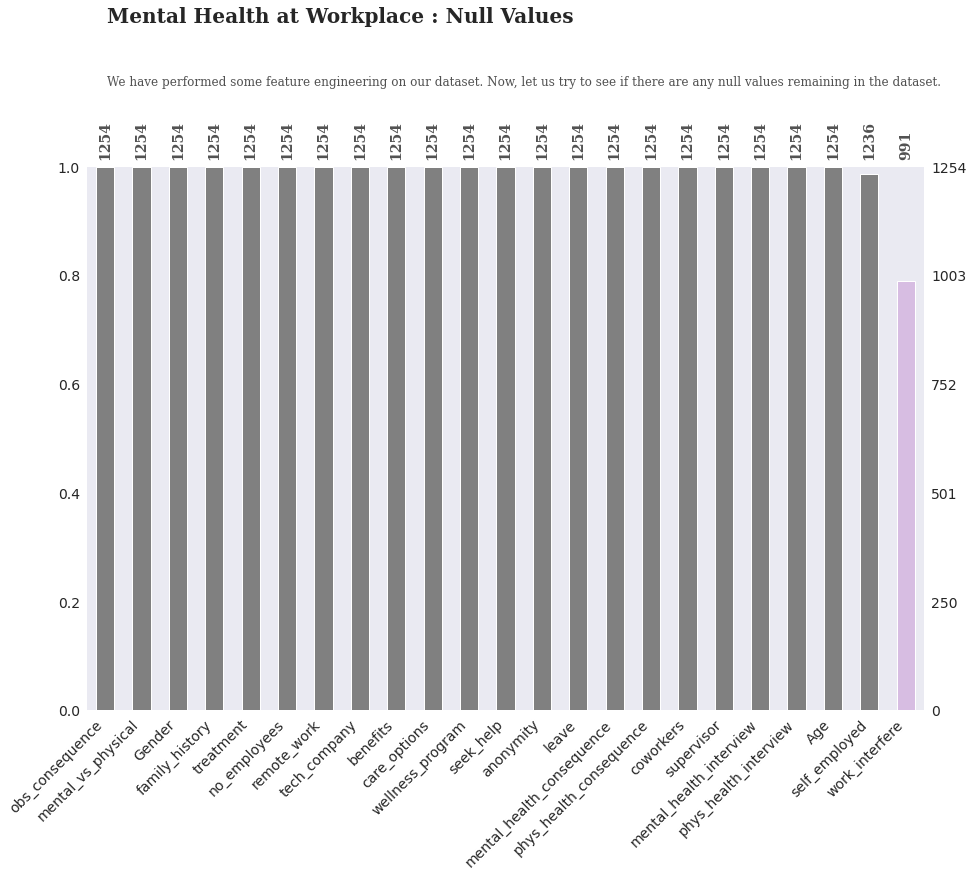

In [10]:
sns.set_style('dark')
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','#D7BDE2']
msno.bar(df,fontsize =14, color = color, sort = 'descending', figsize = (15,10))

plt.text(0.05,1.265,'Mental Health at Workplace : Null Values', {'font':'serif', 'size':20, 'weight':'bold'})
plt.text(0.05,1.15,'''We have performed some feature engineering on our dataset. Now, let us try to see if there are any null values remaining in the dataset.''', {'font':'serif', 'size':12, 'weight':'normal'}, alpha = 0.8)
plt.xticks( rotation = 90, 
                   **{'font':'serif','size':14,'weight':'bold','horizontalalignment': 'center'},alpha = 0.8)

plt.show()


* There's only one column which is **'work_interfere'** remaining that contains null values. For now we will proceed without any imputation. 
* Actually, there's another column, **'self_employed'** which contains around 18 null values which we failed to notice at first.

> Now let us move forward and perform EDA

<h1 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;	"> Exploratory Data Analysis </h1>



![Alt_Text](https://miro.medium.com/max/615/1*Nr8BJzXWodgpDZl-54abrQ.jpeg)

Before begining with the EDA which should learn about the organization which has collected this data.

* Every year, **OSMI** came out with a new survey to see how employees want to get mental health treatment in tech companies around the world and I pick the survey from 2014.
* This survey is filled by respondents who suffer from mental health disorders (diagnose or un-diagnosed by medical, even it's just a feeling) in tech companies and see if any factors can affect the employee to get treatment or not.
* From this research, this machine learning can help HR to see what factors have the company needs to support so the employee wants to get mental health treatment.

> Let us begin by understanding the target data!

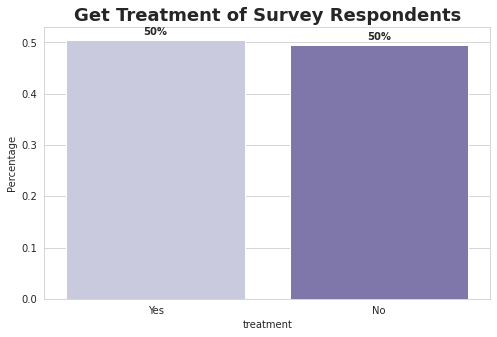

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

<h3 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;	"> Inferences: </h3>


This is the respondents result of question, **'Have you sought treatment for a mental health condition?'**.


This is our target variable.
Looking at the first graph, we see that the percentage of respondents who want to get treatment is exactly 50%. Workplaces that promote mental health and support people with mental disorders are more likely to  have increased productivity, reduce absenteeism, and benefit from associated economic gains. If employees enjoy good mental health, employees can:


> After analysing the target variable, we will try to explore the individual columns and what they mean.

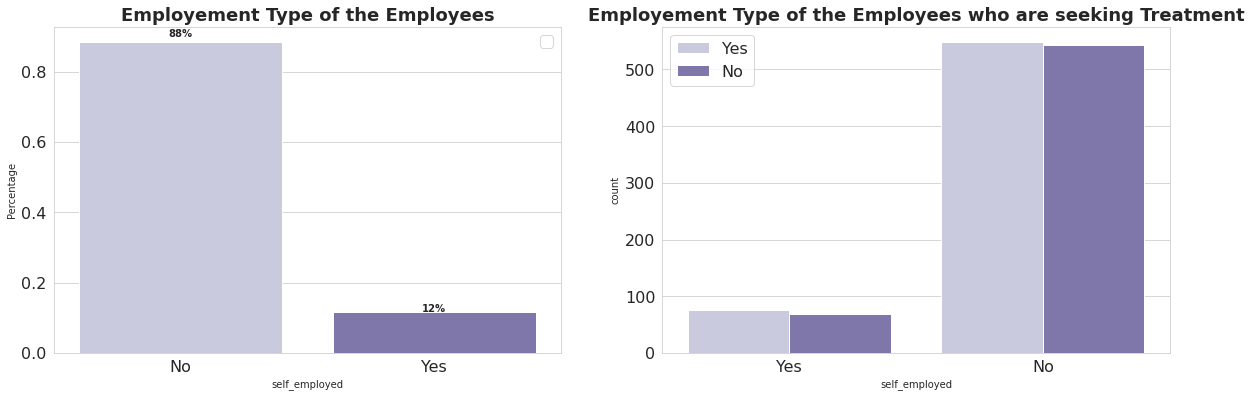

In [12]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['self_employed'].value_counts(normalize = True).rename_axis('self_employed').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'self_employed', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Employement Type of the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['self_employed'], hue = df['treatment'], palette = 'Purples')
plt.title('Employement Type of the Employees who are seeking Treatment',  fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

This is respondent's answer to the question, '**Are you self-employed?**'.

We see that the number of people who are self employed are around 10%. Most of the people who responded to the survey belonged to working class. We also see that though there is a vast difference between people who are self employed or not, the number of people who seek treatment in both the categories is more or less similar. 

> Thus, we may conclude that whether a person is self employed or not, does not largely affect whether he may be seeking mental treatment or not. 

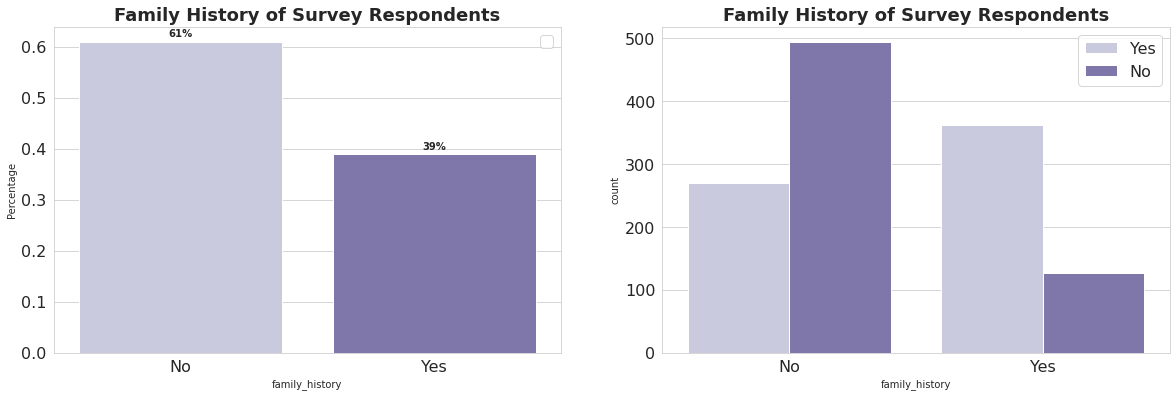

In [13]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'family_history', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['family_history'], hue = df['treatment'], palette='Purples')
plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

<h3 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;	"> Inference: </h3>

This is the respondents answer to the question, **'Do you have a family history of mental illness?'**.

From close to 40% of the respondents who say that they have a family history of mental illness, the plot shows that they significantly want to get treatment rather than without a family history. This is acceptable, remember the fact that people with a family history pay more attention to mental illness. Family history is a significant risk factor for many mental health disorders. 

> Thus, this is an important factor that has to be taken under consideration as it influences the behaviour of the employees to a significant extent.



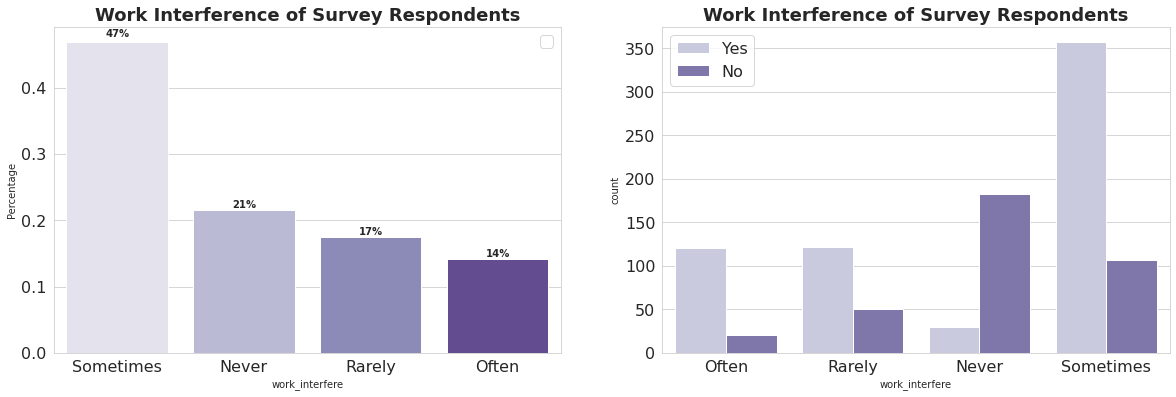

In [14]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['work_interfere'], hue = df['treatment'], palette = 'Purples')
plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


<h3 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;	"> Inference: </h3>


This was the respondent's answer to the question, **'If you have a mental health condition, do you feel that it interferes with your work?'.**

* On seeing the first graph we conclude that around 48% of people say that sometimes work interefers with their mental health. Now **'Sometimes'** is a really vague response to a question, and more often than not these are the people who actually face a condition but are too shy/reluctant to choose the extreme category.
* Coming to our second graph, we see that the people who chose **'Sometimes'** had the highest number of people who actually had a mental condition. Similar pattern was shown for the people who belonged to the **'Often category'*.
* But what is more surprising to know is that even for people whose mental health **'Never'** has interfered at work, there is a little group that still want to get treatment before it become a job stress. It can be triggered a variety of reasons like the requirements of the job do not match the capabilities, resources or needs of the worker.






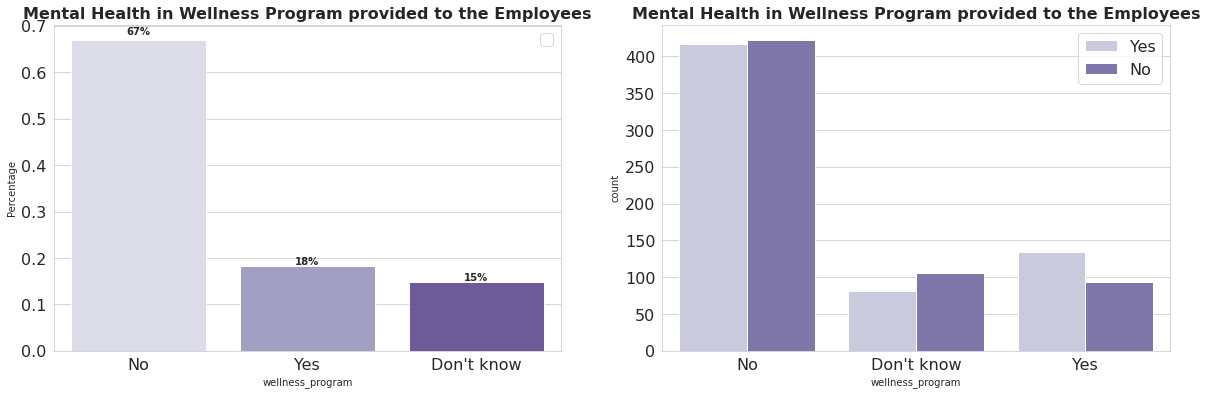

In [15]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'wellness_program', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['wellness_program'], hue = df['treatment'], palette='Purples')
plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;	"> Inference: </h3>

This is the respondents answer to the question, **'Has your employer ever discussed mental health as part of an employee wellness program?'.**

* About 19% of the repondents say **YES** about becoming a part of the employee wellness program and out of those 60% of employee want to get treatment. 
* One shocking revealation is that more than 65% of respondents say that there aren't any wellness programs provided by their company. But close to half of those respondents want to get treatment, which means the company needs to fulfil its duty and provide it soon. 
 


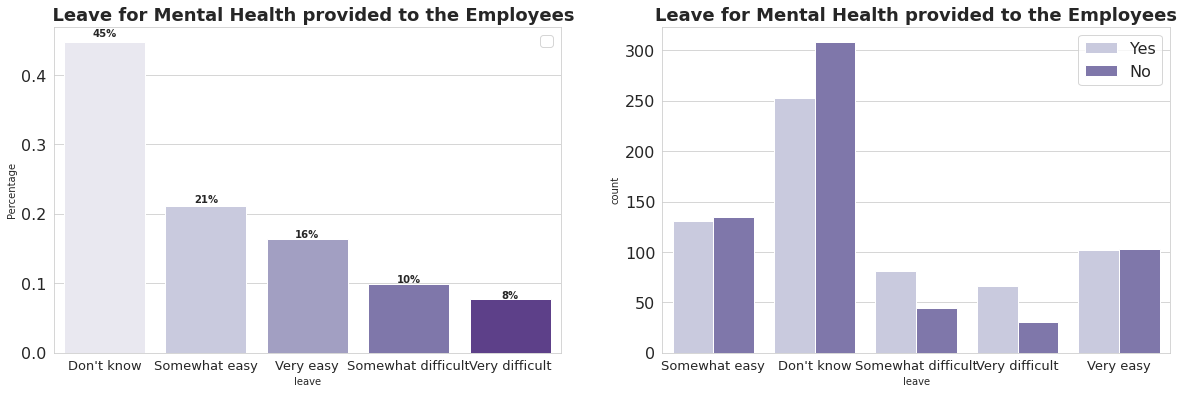

In [16]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['leave'].value_counts(normalize = True).rename_axis('leave').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'leave', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('  Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['leave'], hue = df['treatment'], palette='Purples')
plt.title('Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This is the respondent's answer to the question, '**How easy is it for you to take medical leave for a mental health condition?**'

* While close to 50% of the people answered that they did not know about it, suprisingly around 45% of those people sought help for their condition.
* A small percent of people ( around 8% ) said that it was very difficult for them to get leave for mental health and out of those, 75% of them sought for help.
* Employees who said it was 'somewhat easy' or 'very easy' to get leave had almost 50% people seeking medical help.

> The next category that we'd be looking into is **mental health consequence.**




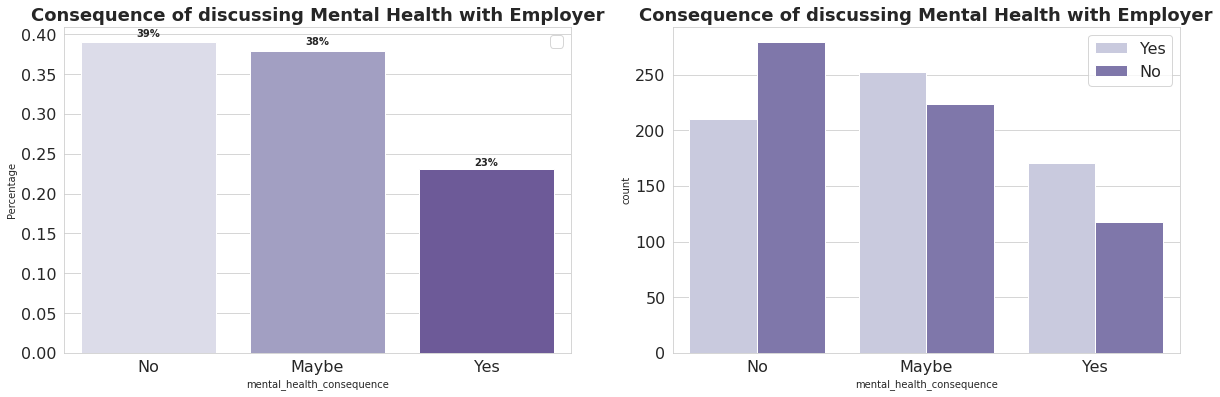

In [17]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_health_consequence'].value_counts(normalize = True).rename_axis('mental_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_health_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['mental_health_consequence'], hue = df['treatment'], palette='Purples')
plt.title('Consequence of discussing Mental Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;	"> Inference: </h3>

This is the respondent's answer to the question, '**Do you think that discussing a mental health issue with your employer would have negative consequences?**'.

* Around same number of people ( around 40% each ) answered **Maybe** as well as **No** for the negative impact of discussing mental health consequences with the employer and about 23% said **Yes** to it.
* 23% is a significant number who feel that discussing their mental health might create a negative impact on their employer. This may be because of the stigma, decreased productivity, impact on promotions or any other preconcieved notion.
* It is nice to know that out of the people who answered No, there were only around 40% of the people who actually sought after help, whereas in both the other categories, it is more than 50%.

> The next factor that we are going to discuss is **physical health consequence.** It will be interesting to compare both of these two together.

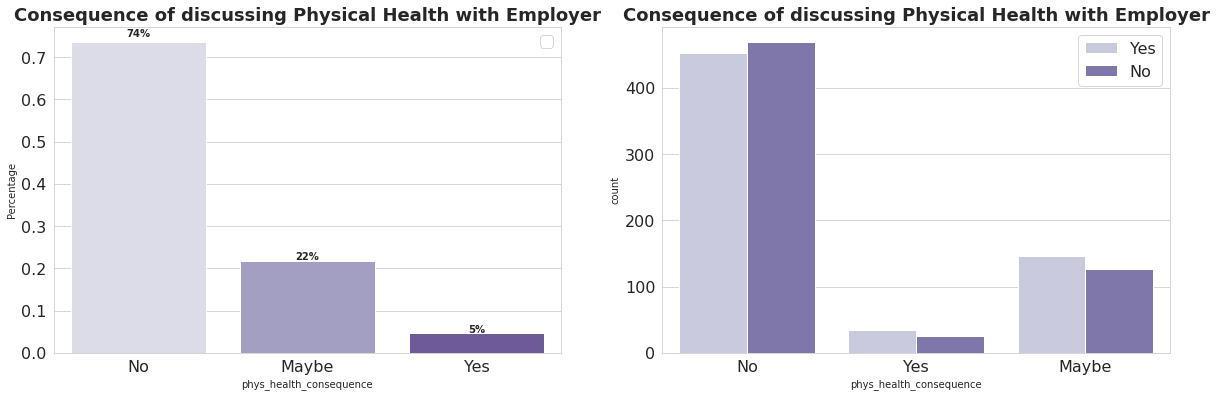

In [18]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['phys_health_consequence'].value_counts(normalize = True).rename_axis('phys_health_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'phys_health_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence of discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['phys_health_consequence'], hue = df['treatment'], palette='Purples')
plt.title('Consequence of discussing Physical Health with Employer', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#D7BDE2	"> Inference: </h3>

This is the respondent's answer to the question, '**Do you think that discussing a physical health issue with your employer would have negative consequences?**'

* There is a starking difference between the reponses for the same question regarding mental and physical health. More than 70% of the employees believe that their physical health does not create a negative impact on their employer and only 5% of them believes that it does. 
* While it maybe incorrect for us to draw any conclusions about whether they seek mental help on the basis of their physical condition, because it is more or less same for all the three categories, we must keep in mind about **how differently mental and physical health are treated as a whole.**

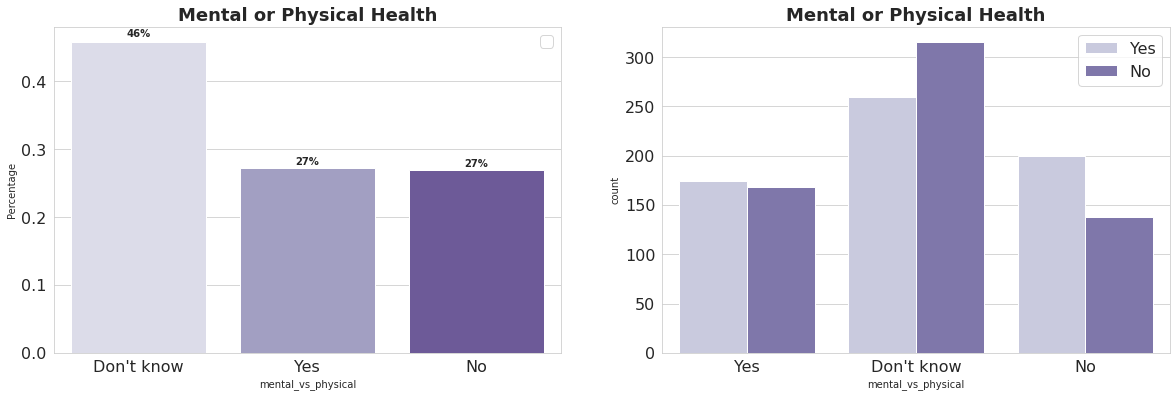

In [19]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['mental_vs_physical'].value_counts(normalize = True).rename_axis('mental_vs_physical').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'mental_vs_physical', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['mental_vs_physical'], hue = df['treatment'], palette='Purples')
plt.title('Mental or Physical Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

This was the respondent's answer to the question, **'Do you feel that your employer takes mental health as seriously as physical health?'**

* While close to 50% people said that they didn't know, the number of people who answered **Yes** as well as **No** were completely equal. 
* For the people who answered Yes as well as the ones who answered No, more than 505 of them sought after medical help for their mental health, whereas it was not the case for the one's belonging to the 'Don't know' category.

> Coming to the last column, we have finally reached to **obs_consequence**. This definitely calls for a meme!

![Alt_Text](https://www.awesomeinventions.com/wp-content/uploads/2016/02/Not-Tired1.jpg)

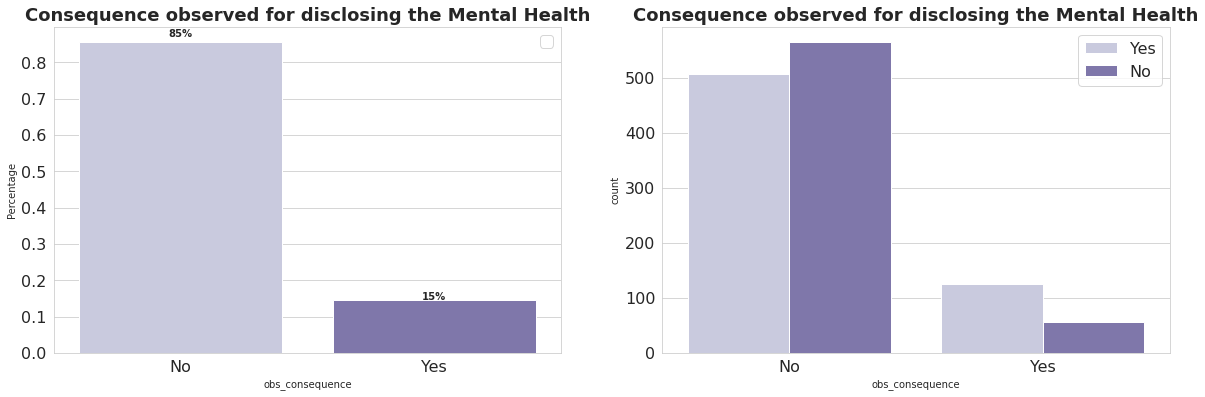

In [20]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['obs_consequence'].value_counts(normalize = True).rename_axis('obs_consequence').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'obs_consequence', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Consequence observed for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(df['obs_consequence'], hue = df['treatment'], palette='Purples')
    
plt.title('Consequence observed for disclosing the Mental Health', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;	"> Inference: </h3>

This was the respondent's answer to the question, **'Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?'**

* Majority ( 85% ) of the people, answered **No** to this question. This is quite important to note  that IT being an organised sector, follows strict guidelines of employee satisfaction etc. Thus, we didn't come across any major issue regarding the employer behavior as such!

> Anyway, I think we're done with the EDA. 

<h1 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;	"> Data Preparation </h1>


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1254 non-null   int64 
 1   Gender                     1254 non-null   object
 2   self_employed              1236 non-null   object
 3   family_history             1254 non-null   object
 4   treatment                  1254 non-null   object
 5   work_interfere             991 non-null    object
 6   no_employees               1254 non-null   object
 7   remote_work                1254 non-null   object
 8   tech_company               1254 non-null   object
 9   benefits                   1254 non-null   object
 10  care_options               1254 non-null   object
 11  wellness_program           1254 non-null   object
 12  seek_help                  1254 non-null   object
 13  anonymity                  1254 non-null   object
 14  leave   

**Note:** 
We have only two columns left that contain null values - **work_interfere** and **self_employed**. 

We will be replacing the blank values with **'Don't Know'** for work_interfere category and for the self_employed

In [22]:
df['work_interfere'] = df['work_interfere'].fillna('Don\'t know' )
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [23]:
df['self_employed'] = df['self_employed'].fillna('No')
print(df['self_employed'].unique())

['No' 'Yes']


In [24]:
df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [25]:
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [26]:
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))
    

AGE :[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72] 
GENDER :['Female' 'Male' 'Other'] 
SELF_EMPLOYED :['No' 'Yes'] 
FAMILY_HISTORY :['No' 'Yes'] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"] 
NO_EMPLOYEES :['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 
REMOTE_WORK :['No' 'Yes'] 
TECH_COMPANY :['Yes' 'No'] 
BENEFITS :['Yes' "Don't know" 'No'] 
CARE_OPTIONS :['Not sure' 'No' 'Yes'] 
WELLNESS_PROGRAM :['No' "Don't know" 'Yes'] 
SEEK_HELP :['Yes' "Don't know" 'No'] 
ANONYMITY :['Yes' "Don't know" 'No'] 
LEAVE :['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy'] 
MENTAL_HEALTH_CONSEQUENCE :['No' 'Maybe' 'Yes'] 
PHYS_HEALTH_CONSEQUENCE :['No' 'Yes' 'Maybe'] 
COWORKERS :['Some of them' 'No' 'Yes'] 
SUPERVISOR :['Yes' 'No' 'Some of them'] 
MENTAL_HEALTH_INTERVIEW :['No' 'Yes' 'Maybe'] 
PHYS_HEALTH_INTE

<h3 style = "font-family: Comic Sans MS;background-color:#FADBD8; padding: 10px; border-radius: 10px;	"> Inference: </h3>

* We can clearly see that all the columns except the '**Age**', consist of object type values.
* We also notice that most of the columns consist of values '**Yes**', '**No**' , '**Maybe**' etc. which can be easily encoded. 
> So the next step that we would perform will be encoding!

In [27]:
# Label Encoding the categorical variables

from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [28]:
df['treatment'].value_counts()

1    633
0    621
Name: treatment, dtype: int64

<AxesSubplot:>

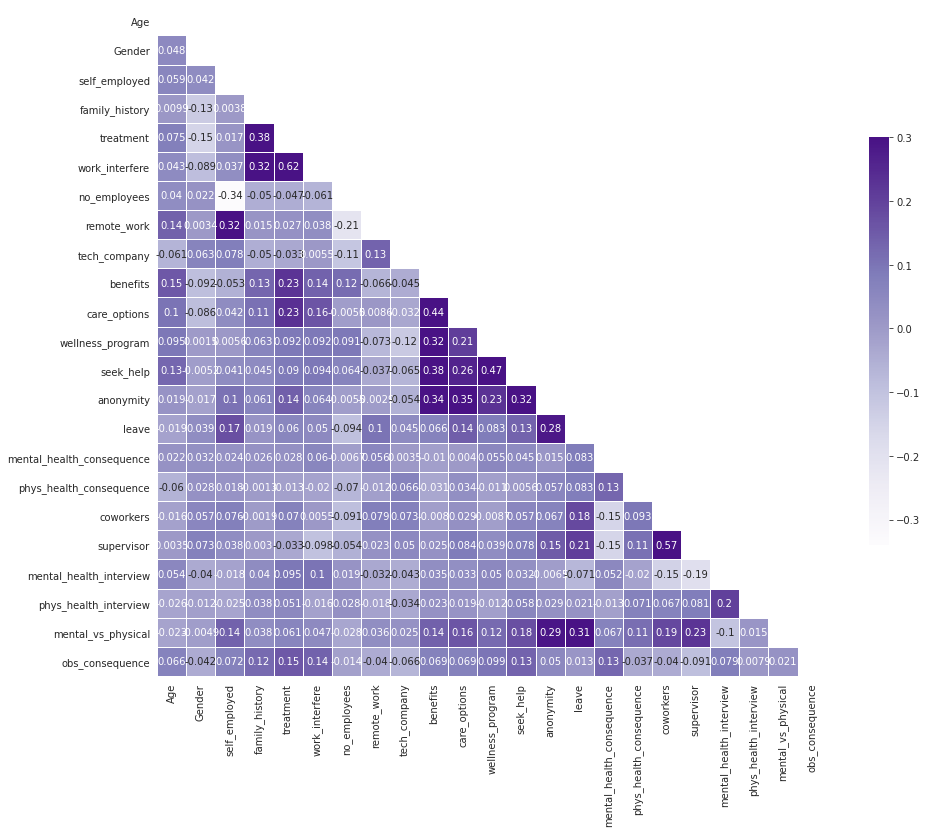

In [29]:
# Compute the correlation matrix
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

<h1 style = "font-family: Comic Sans MS;background-color:#D7BDE2	">  Evaluating Models </h1>


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import metrics

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop('treatment', axis = 1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)

In [32]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20), AdaBoostClassifier(), xgb.XGBClassifier(random_state=0,booster="gbtree")]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               random_state=0, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               val

Text(33.0, 0.5, 'Actual')

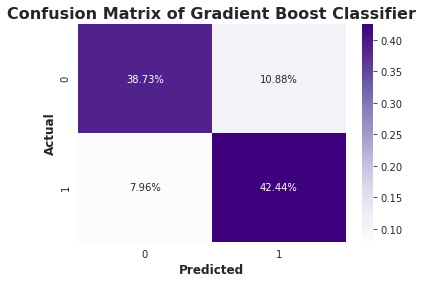

In [33]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Gradient Boost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

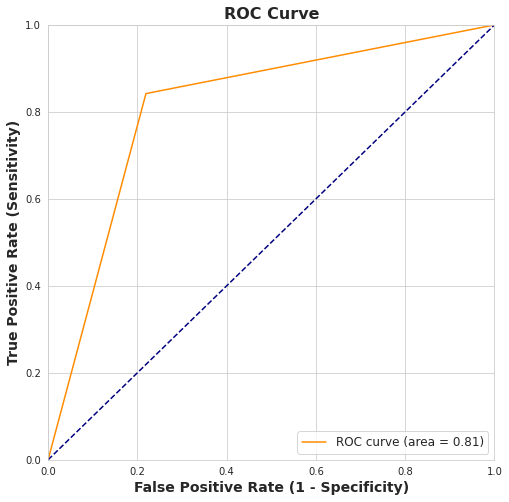

(array([0.        , 0.21925134, 1.        ]),
 array([0.        , 0.84210526, 1.        ]),
 array([2, 1, 0]))

In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
metrics.roc_curve(y_test, pred)

Thanks for sticking till the very end of this notebook!

In [35]:
from sklearn.tree import DecisionTreeClassifier
import joblib

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
joblib.dump(model, "model.pkl")


['model.pkl']